### Введение

#### Краткое описание проекта

Необходимо проанализировать причины убытков развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача аналитика — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Аналитику предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

#### Описание данных

В распоряжении анлитика три датасета.

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

#### План анализа

- Загрузка данные и подготовка их к анализу
- Задание функций для расчета и анализа
- Исследовательский анализ данных
- Оценка маркетинга
- Оценка окупаемости рекламы
- Выводы

### Загрузка данные и подготовка их к анализу

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`.
- заказы: `/datasets/orders_info_short.csv`.
- расходы: `/datasets/costs_info_short.csv`.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Изучение данных

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
sessions = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')
events = None

#знакомимся с таблицами
display(sessions.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


#### Преобразование данных

In [3]:
#переименовываем названия столбцов в таблицах
sessions = sessions.rename(
    columns={
        'User Id': 'user_id',
        'Region': 'region',
        'Device': 'device',
        'Channel': 'channel',
        'Session Start': 'session_start',
        'Session End':'session_end'
    }
)

orders = orders.rename(
    columns={
        'User Id': 'user_id',
        'Event Dt': 'event_dt',
        'Revenue': 'revenue'
    }
)

costs = costs.rename(columns={'Channel': 'channel'})
#смотрим на результат
#повторно знакомимся с таблицами
display(sessions.head())
display(orders.head())
display(costs.head())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
# проводим предобработку данных для sessions.
#получаем информацию и наличии пропусков и дубликатов
sessions.info()
#проверяем на пропуски
print(sessions.isna().sum())
#проверяем на дубликаты
sessions.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64


0

In [5]:
#преобразуем данные session_start и session_end в формат даты
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])
#проверяем результат
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [6]:
# проводим предобработку данных для orders.
#получаем информацию и наличии пропусков и дубликатов
orders.info()
#проверяем на пропуски
print(orders.isna().sum())
#проверяем на дубликаты
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
user_id     0
event_dt    0
revenue     0
dtype: int64


0

In [7]:
#преобразуем данные event_dt в формат даты
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
#проверяем результат
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [8]:
# проводим предобработку данных для costs.
#получаем информацию и наличии пропусков и дубликатов
costs.info()
#проверяем на пропуски
print(costs.isna().sum())
#проверяем на дубликаты
costs.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
dt         0
channel    0
costs      0
dtype: int64


0

In [9]:
#преобразуем данные event_dt в формат даты
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
#проверяем результат
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Исходные таблицы содержат необходимую информацию, пропуски и дубликаты данных отсутствуют. Формат столбцов, содержащих сведения о дате, приведен в надлежащий вид.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания профилей

In [10]:
# функция для создания профилей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

#### Функция для расчета LTV

In [11]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для расчета коэффициента удержания

In [12]:
# функция для расчета коэффициента удержания
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')      
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) 
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   
        result = result.div(result['cohort_size'], axis = 0)                                                     
        result = result[['cohort_size'] + list(range(horizon_days))]                                             
        result['cohort_size'] = cohort_sizes                                                                     
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

#### Функция для расчета конверсии

In [13]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для сглаживания данных

In [14]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для построения графика удержания

In [15]:
def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

#### Функция для построения графика конверсии

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для построения графиков LTV и ROI

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для построения графиков динамики изменения расходов

In [18]:
def plot_costs(costs, value=[]):
    
    costs = costs.query('channel == @value')
    costs_w = costs.pivot_table(index=['week'], columns='channel', values='costs',aggfunc='sum')
    costs_m = costs.pivot_table(index=['month'], columns='channel', values='costs',aggfunc='sum')
    
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))
    # первый график — неделя
    ax1 = plt.subplot(1, 2, 1)
    costs_w.plot(grid=True, ax=ax1)
    plt.xlabel('Неделя')
    plt.title('Динамика изменения расходов по неделям')
    
    # второй график — месяц
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    costs_m.plot(grid=True, ax=ax2)
    plt.xlabel('Месяц')
    plt.title('Динамика изменения расходов по месяцам')
  
    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составляем профили пользователей

In [19]:
#составим профили пользователей
profiles = get_profiles(sessions, orders, events, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


#### Определяем минимальную и максимальную дату привлечения пользователей

In [20]:
display(profiles['first_ts'].min())
display(profiles['first_ts'].max())

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-27 23:59:04')

Минимальная дата привлечения пользователей 1 мая 2019 года

Максимальная дата привлечения пользователей 27 октября 2019 года

#### Определяем распределение пользователей по странам

In [21]:
#строим сводную таблицу пользователей по странам
table_1 = profiles.groupby('region').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
#выбираем платящих пользователей
profiles_p = profiles.query('payer == True')
#строим сводную таблицу платящих пользователей по странам
table_2 = profiles_p.groupby('region').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
#объединяем таблицы
table_1 = table_1.merge(table_2, on = 'region', how = 'left')
#переименовываем столбцы
table_1 = table_1.rename(
    columns={
        'user_id_x': 'users',
        'user_id_y': 'paying_users'        
    }
)
#определяем доли платящих пользователей от общего количество
table_1['share,%'] = ((table_1['paying_users']/table_1['users'])*100).round(decimals = 2)
display(table_1)

,users,paying_users,"share,%"
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


В США почти 7% пользователей от общего количества пользователей конвертируются в платящих, для остальных стран конверсия значительно меньше, наименьшее значение у Франции.

#### Определяем устройства пользователей

In [22]:
#строим сводную таблицу пользователей по устройствам
table_1 = profiles.groupby('device').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
#выбираем платящих пользователей
profiles_p = profiles.query('payer == True')
#строим сводную таблицу платящих пользователей по устройствам
table_2 = profiles_p.groupby('device').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
#объединяем таблицы
table_1 = table_1.merge(table_2, on = 'device', how = 'left')
#переименовываем столбцы
table_1 = table_1.rename(
    columns={
        'user_id_x': 'users',
        'user_id_y': 'paying_users'        
    }
)
#определяем доли платящих пользователей от общего количество
table_1['share,%'] = ((table_1['paying_users']/table_1['users'])*100).round(decimals = 2)
display(table_1)

,users,paying_users,"share,%"
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05
Mac,30042,1912,6.36


Большинство мобильных пользователей используют iPhone, стационарные пользователи чаще используют PC. При этом, конверсия пользователей, больше всех у пользователей Mac, затем у пользователей iPhone, наименьшее значение у пользователей PC.

#### Определяем распределение пользователей по рекламным каналам

In [23]:
#строим сводную таблицу пользователей по каналам
table_1 = profiles.groupby('channel').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)

#выбираем платящих пользователей
profiles_p = profiles.query('payer == True')
#строим сводную таблицу платящих пользователей по каналам
table_2 = profiles_p.groupby('channel').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
#объединяем таблицы
table_1 = table_1.merge(table_2, on = 'channel', how = 'left')
#переименовываем столбцы
table_1 = table_1.rename(
    columns={
        'user_id_x': 'users',
        'user_id_y': 'paying_users'        
    }
)
#определяем доли платящих пользователей от общего количество
table_1['share,%'] = ((table_1['paying_users']/table_1['users'])*100).round(decimals = 2)
display(table_1.sort_values(by='share,%', ascending=False))

,users,paying_users,"share,%"
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


In [24]:
table_1 = profiles.pivot_table(index=['region', 'channel'], values='user_id',aggfunc='count')
display(table_1)

user_id
region        channel                    
France        AdNonSense             1366
              LeapBob                2988
              OppleCreativeMedia     2991
              WahooNetBanner         2971
              lambdaMediaAds          742
              organic                6392
Germany       AdNonSense             1219
              LeapBob                2519
              OppleCreativeMedia     2562
              WahooNetBanner         2579
              lambdaMediaAds          649
              organic                5453
UK            AdNonSense             1295
              LeapBob                3046
              OppleCreativeMedia     3052
              WahooNetBanner         3003
              lambdaMediaAds          758
              organic                6421
United States FaceBoom              29144
              MediaTornado           4364
              RocketSuperAds         4448
              TipTop                19561
              YRabbit                4312
              organic               38173

Наибольшая конверсия пользователей у каналов FaceBoom, AdNonSense и lambdaMediaAds. При этом, есть каналы с очень низким значением конверсии, например OppleCreativeMedia, близкое к нему значение конверсии у органических пользователей.
В абсолютном выражении, органических пользователей почти 35% от общего количества пользователей, на втором месте FaceBoom, далее TipTop. 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

In [25]:
all_market = costs['costs'].sum()
display(round(all_market))

105497

Общая сумма расходов на маркетинг составила 105 497 долларов.

#### Распределение по рекламным источникам

In [26]:
#выясняем как расходы распределены по рекламным источникам
market = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
market['share,%'] = (market['costs']/sum(market['costs'])*100).round(decimals = 2)
display(market)

,costs,"share,%"
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Больше 50% расходов на маркетинг уходит на источник TipTop, 30% на FaceBoom и оставшиеся менее 20% на остальные источники. При этом TipTop обеспечивает приток 20% пользователей. а FaceBoom более 40% пользователей.

#### Визуализация динамики изменения расходов

In [27]:
# для построения диаграммы добавляем дополнительные столбцы недели и месяца в таблицу costs
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
display(costs.head())

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


In [28]:
pivot1 = costs.pivot_table(index=['month','week'],columns='channel',values='costs', aggfunc='sum')

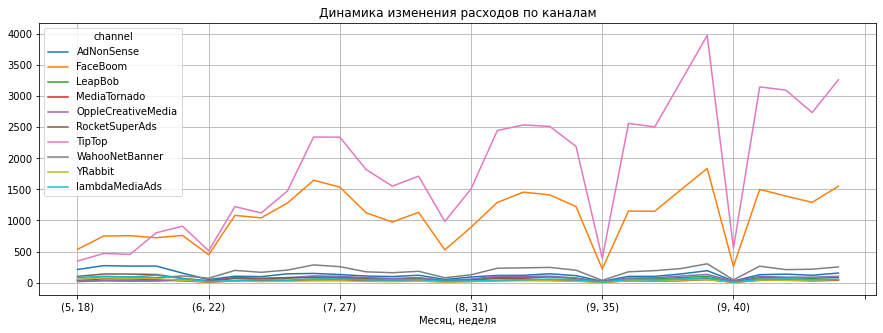

In [29]:
#строим визуализацию динамики изменения расходов во времени
pivot1.plot(
    grid=True,
    figsize=(15, 5),
)
plt.xlabel('Месяц, неделя')
plt.title('Динамика изменения расходов по каналам')
plt.show()

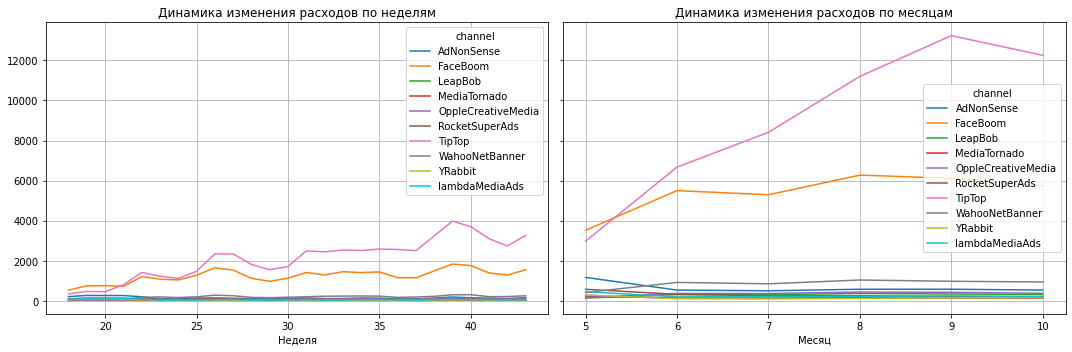

In [30]:
costs_w = costs.pivot_table(index=['week'], columns='channel', values='costs',aggfunc='sum')
costs_m = costs.pivot_table(index=['month'], columns='channel', values='costs',aggfunc='sum')
    
# задаём размер сетки для графиков
plt.figure(figsize=(15, 5))
# первый график — неделя
ax1 = plt.subplot(1, 2, 1)
costs_w.plot(grid=True, ax=ax1)
plt.xlabel('Неделя')
plt.title('Динамика изменения расходов по неделям')
    
# второй график — месяц
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs_m.plot(grid=True, ax=ax2)
plt.xlabel('Месяц')
plt.title('Динамика изменения расходов по месяцам')
 
plt.tight_layout()
plt.show()

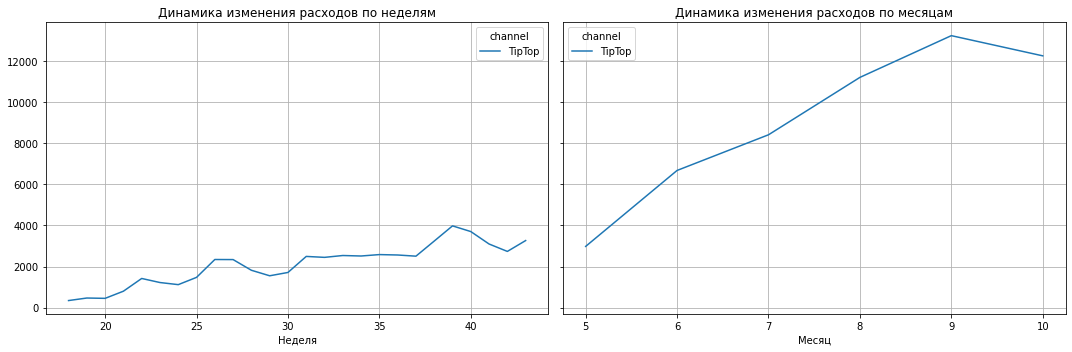

In [31]:
plot_costs(costs,value=['TipTop'])

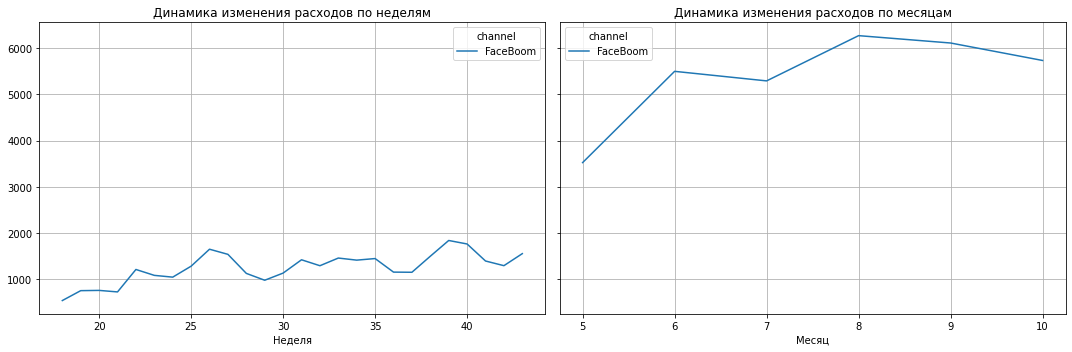

In [32]:
plot_costs(costs,value=['FaceBoom'])

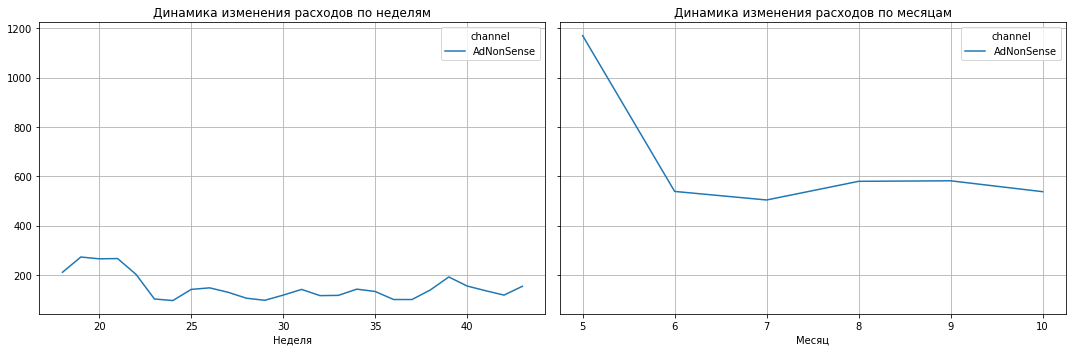

In [33]:
plot_costs(costs,value=['AdNonSense'])

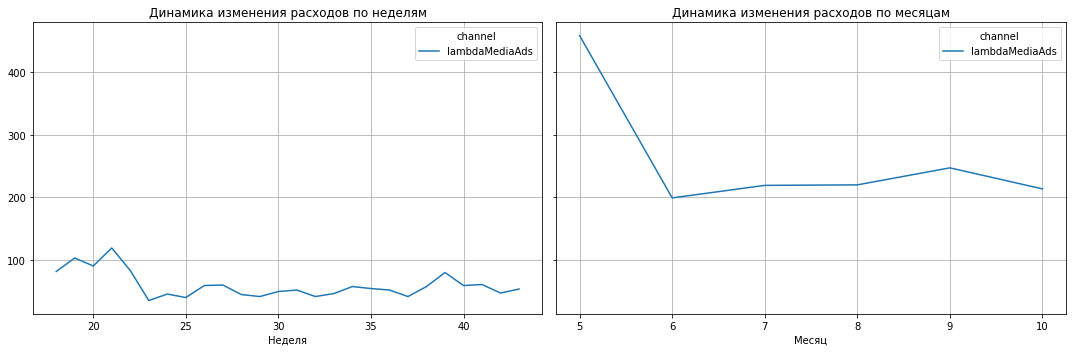

In [34]:
plot_costs(costs,value=['lambdaMediaAds'])

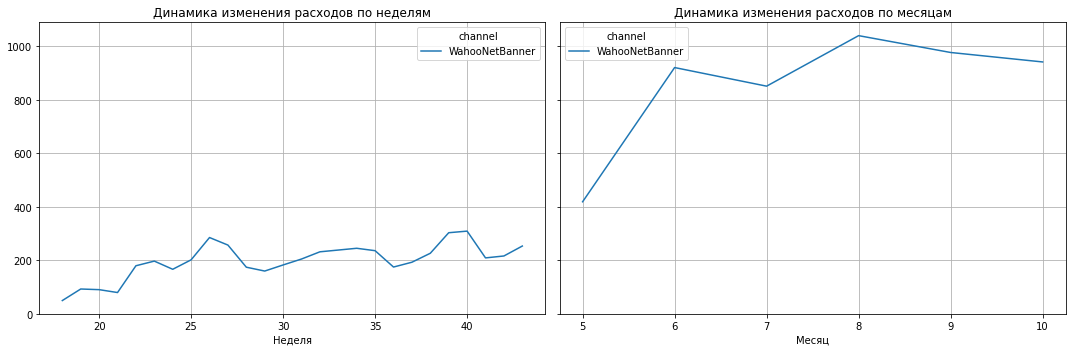

In [35]:
plot_costs(costs,value=['WahooNetBanner'])

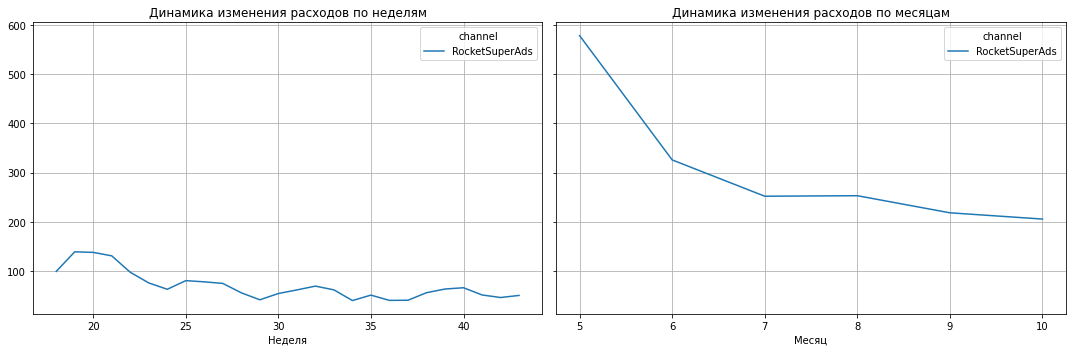

In [36]:
plot_costs(costs,value=['RocketSuperAds'])

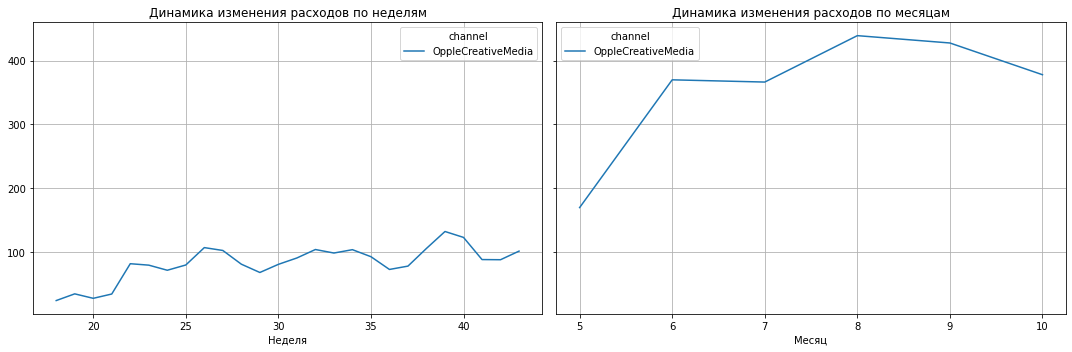

In [37]:
plot_costs(costs,value=['OppleCreativeMedia'])

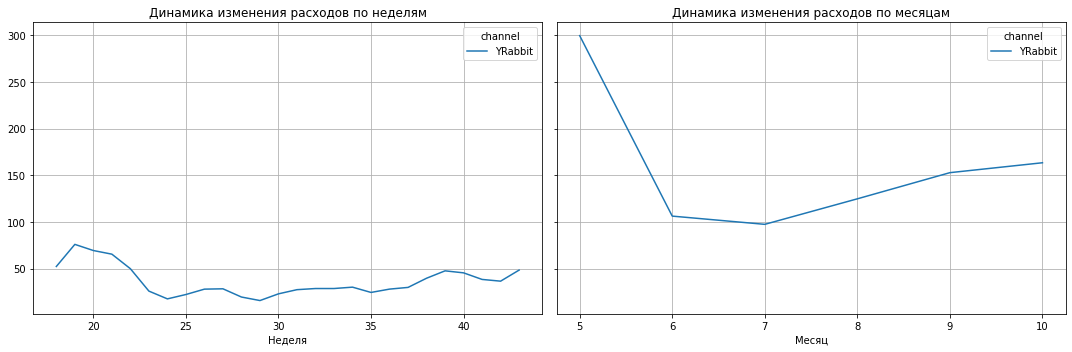

In [38]:
plot_costs(costs,value=['YRabbit'])

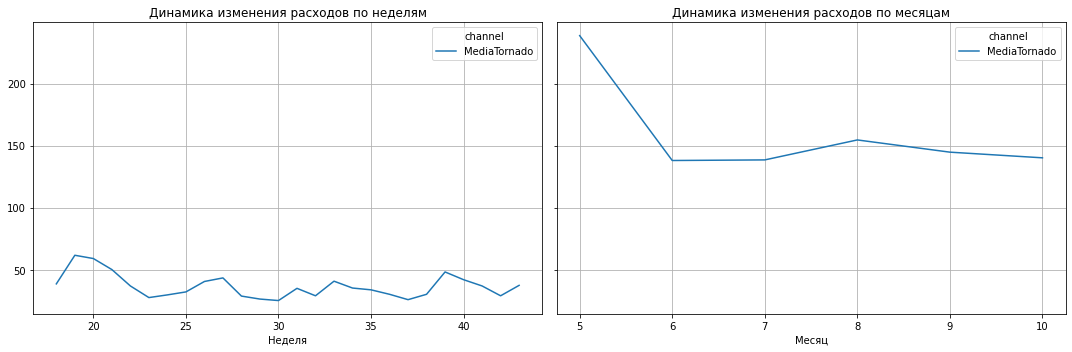

In [39]:
plot_costs(costs,value=['MediaTornado'])

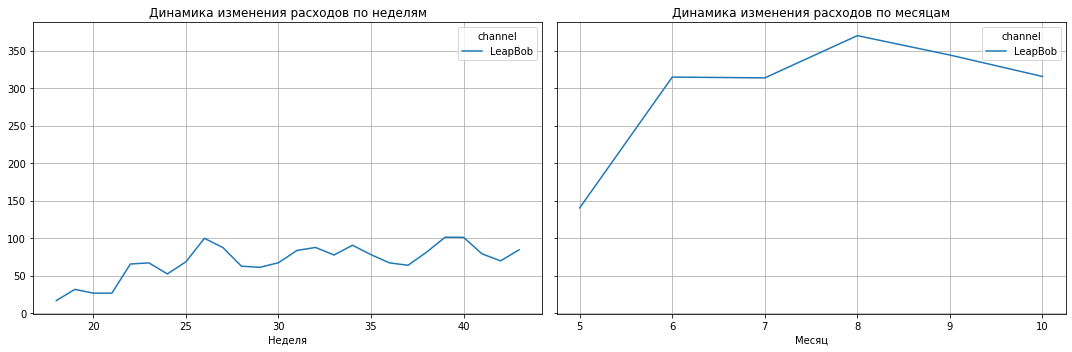

In [40]:
plot_costs(costs,value=['LeapBob'])

Есть каналы, месячные расходы на рекламу у которых в течение рассматриваемого периода растут, это LeapBob, OppleCreativeMedia, WahooNetBanner, FaceBoom и TipTop. У остальных каналов месячные расходы падают. И падение происходит в начале рассматриваемого периода. По графикам недельных расходов вывод сделать сложно.

#### Расчет среднего значения CAC

In [41]:
#определяем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
profiles_1 = profiles.query('channel != "organic"')
mean_CAC = profiles_1.pivot_table(index='channel',values='acquisition_cost',aggfunc='mean')
mean_CAC = (mean_CAC.sort_values(by='acquisition_cost',ascending=False)).round(decimals = 2).rename(
    columns={'acquisition_cost': 'CAC'})
display(mean_CAC)

,CAC
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [42]:
#рассчитываем среднее значение CAC
m_CAC = mean_CAC['CAC'].mean()
display(m_CAC.round(decimals=2))

0.76

#### Промежуточные выводы

Общие расходы на маркетинг составили 105 497 долларов. Данные расходы распределены достаточно неравномерно, основная сумма более 80% расходов направлена на два источника, TipTop и FaceBoom. В целом, это оправдано, поскольку из данных источников приходит основной, более 60% трафик платящих покупателей. По этим цифрам можно предположить о неэффективности расходов. Также стоимость привлечения для источника TipTop, в сравнении с другими источниками, значительно выше и составляет 2,8 долларов. Для остальных источников, стоимость привлечения составляет от 0,21 до 1,11 долларов. При этом среднее значение CAC по всем рекламным каналам равно 0,76. Таким образом, для канала TipTop превышение над средним CAC почти в три раза, а для канала LeapBob стоимость привлечения пользователя в три раза ниже среднего значения.

In [56]:
profiles_2 = profiles.query('channel != "organic"')
mean_CAC = profiles['acquisition_cost'].mean().round(decimals=2)
display(mean_CAC)

1.13

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы c помощью графиков LTV и ROI

Последующий анализ делается для пользователей с платных каналов

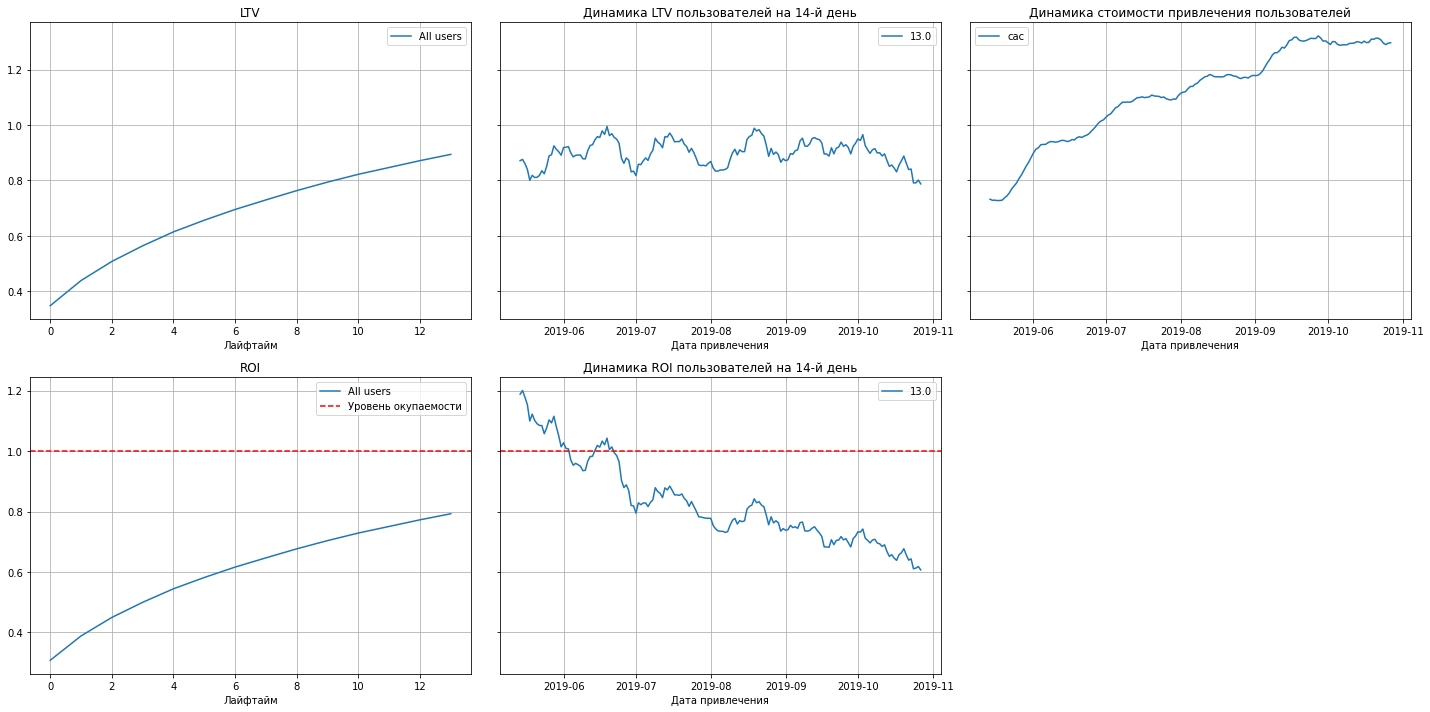

In [43]:
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2020, 11, 1).date(), 14)
    
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=14)

Исходя из построенных графиков, можно сделать вывод о том, что предусмотренная бизнес-планом окупаемость пользователей не позднее чем через две недели после привлечения, не достигается. При этом, если LTV в течение срока наблюдения остается примерно одинаковой величиной, стоимость привлечения пользователей (CAC) постоянно растет. И, соответственно, окупаемость пользователей снижается в течение срока наблюдения, и уже в июне ROI становится ниже 1.

#### Проверка конверсии пользователей и динамики изменения.

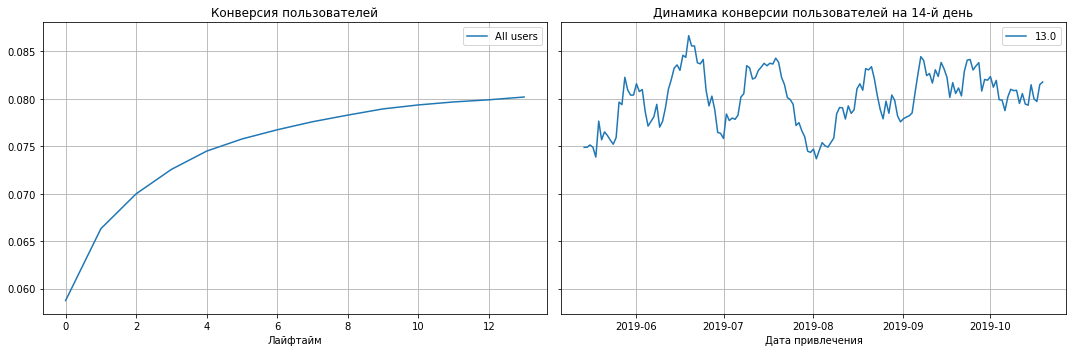

In [44]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14)

plot_conversion(result_grouped, result_in_time, 14, window=14)

Кривая конверсии плавно растёт от значения конверсии в первый день в направлении единицы. Кривая конверсии не снижается.
Конверсия пользователей за весь период наблюдения стремится к 6 процентам. В начале периода происходит рост и далее показатель конверсии стабилизируется.

#### Проверка удержания пользователей и динамики изменения.

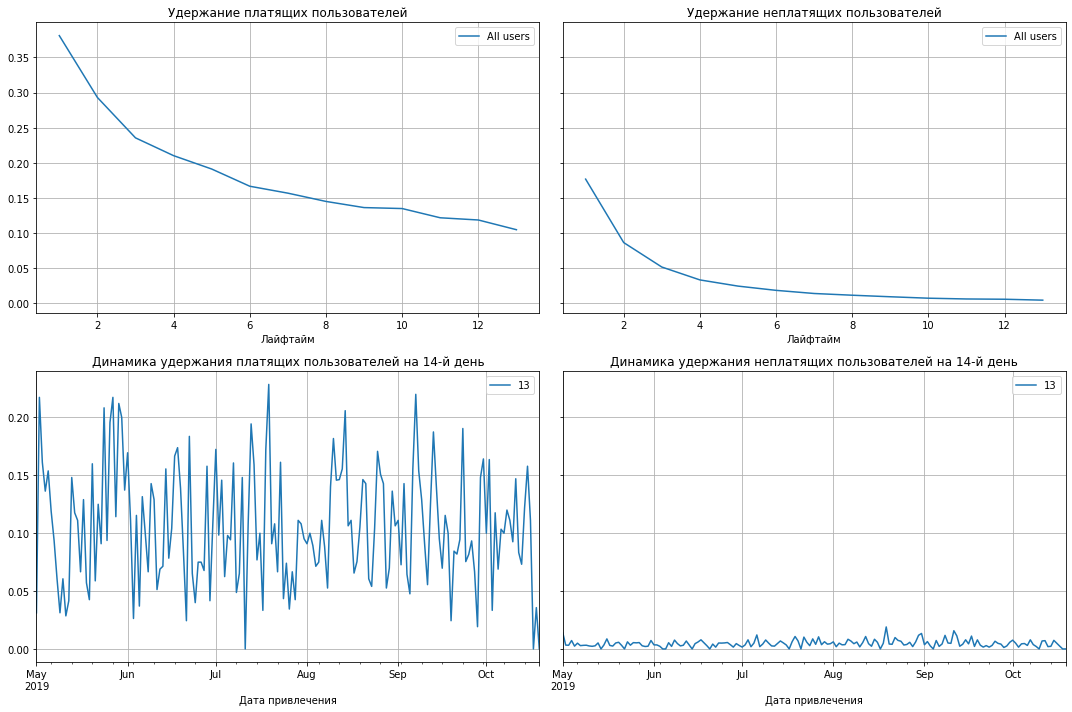

In [45]:
result_raw, result_grouped, result_in_time = get_retention(profiles, sessions, datetime(2019, 11, 1).date(), 14)

plot_retention(result_grouped, result_in_time, 14)

Удержание неплатящих пользователей убывает быстрее чем платяших и в абсолютных величинах удержание неплатящих значительно ниже, чем у платящих. Удержание убывает по экспоненциальному закону. На 14 день удержание платящих пользователей равно примерно 0,12 для неплатящих значение удержания практически равно нулю.

#### Анализ окупаемости рекламы с разбивкой по устройствам

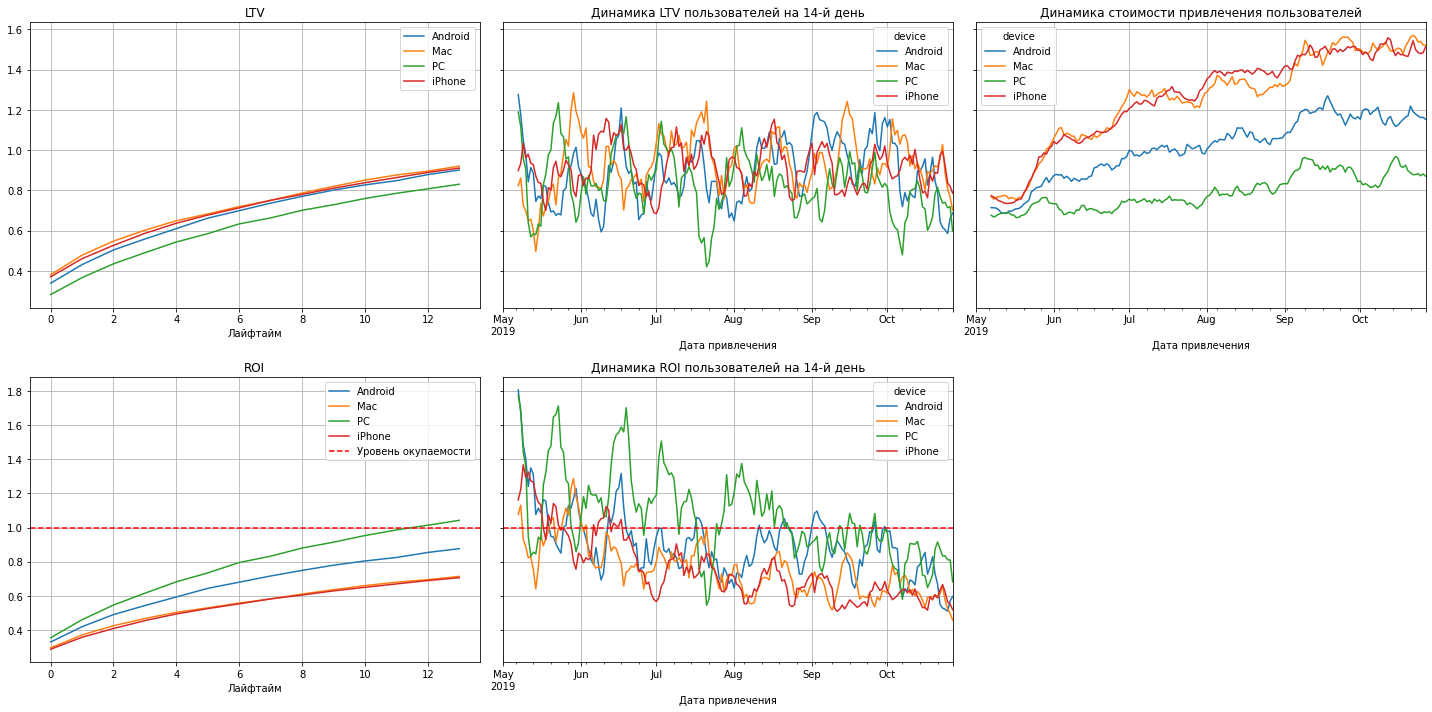

In [46]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2020, 11, 1).date(), 14, dimensions=['device'])
    
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

На основании графиков можно сделать вывод об окупаемости рекламы для пользователей PC, реклама для пользователей Android, Mac и IPhone не окупается. Связано это с тем, что стоимость привлечения пользователей Android, Mac и IPhone в течение всего периода наблюдения значительно выше, чем CAC пользователей PC. При этом значение LTV для пользователей PC ниже, чем для пользователей других устройств.

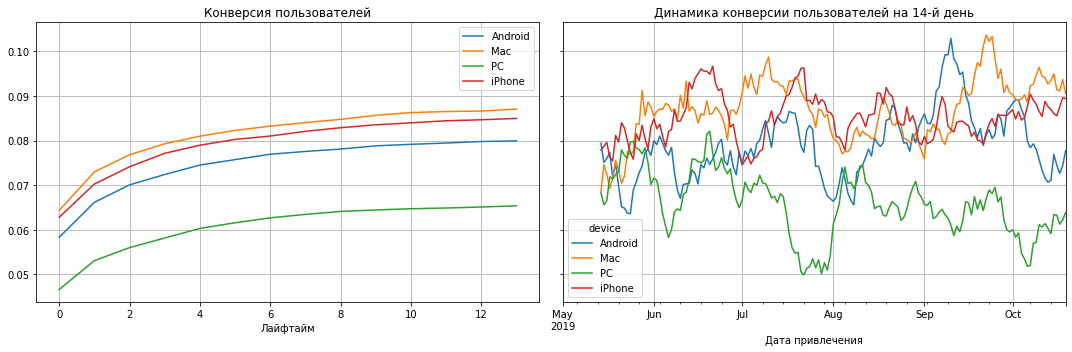

In [47]:
# смотрим конверсию с разбивкой по устройству

result_raw, result_grouped, result_in_time = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

plot_conversion(result_grouped, result_in_time, 14, window=14)

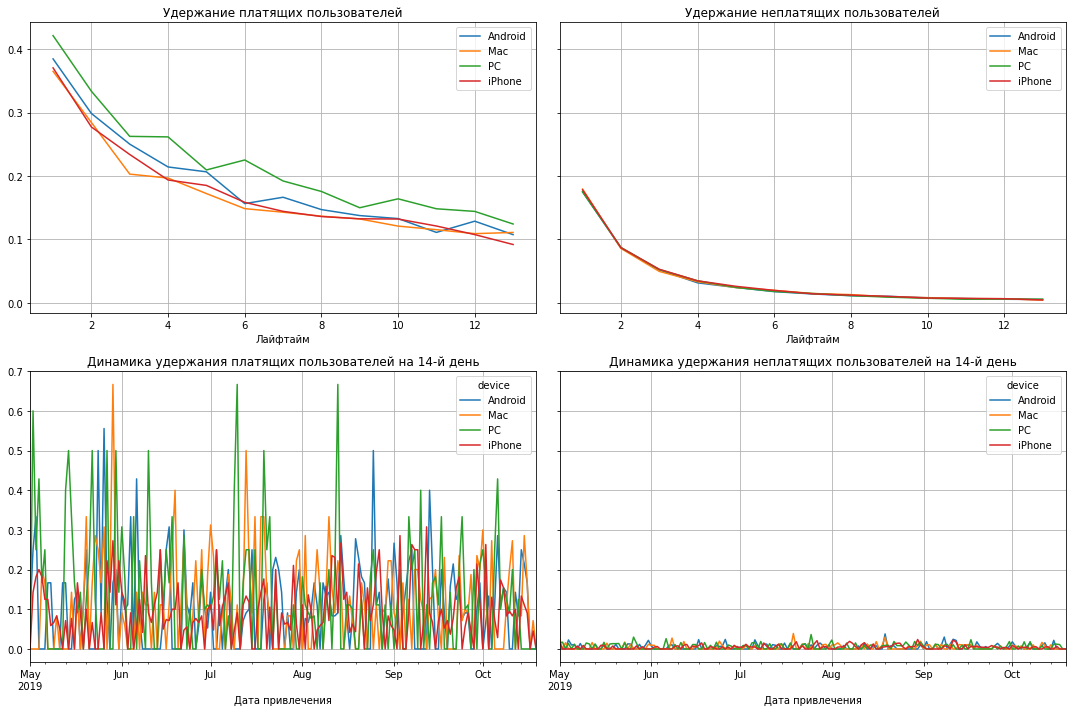

In [48]:
# смотрим удержание с разбивкой по устройству

result_raw, result_grouped, result_in_time = get_retention(
    profiles, sessions, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

plot_retention(result_grouped, result_in_time, 14)

#### Анализ окупаемости рекламы с разбивкой по регионам

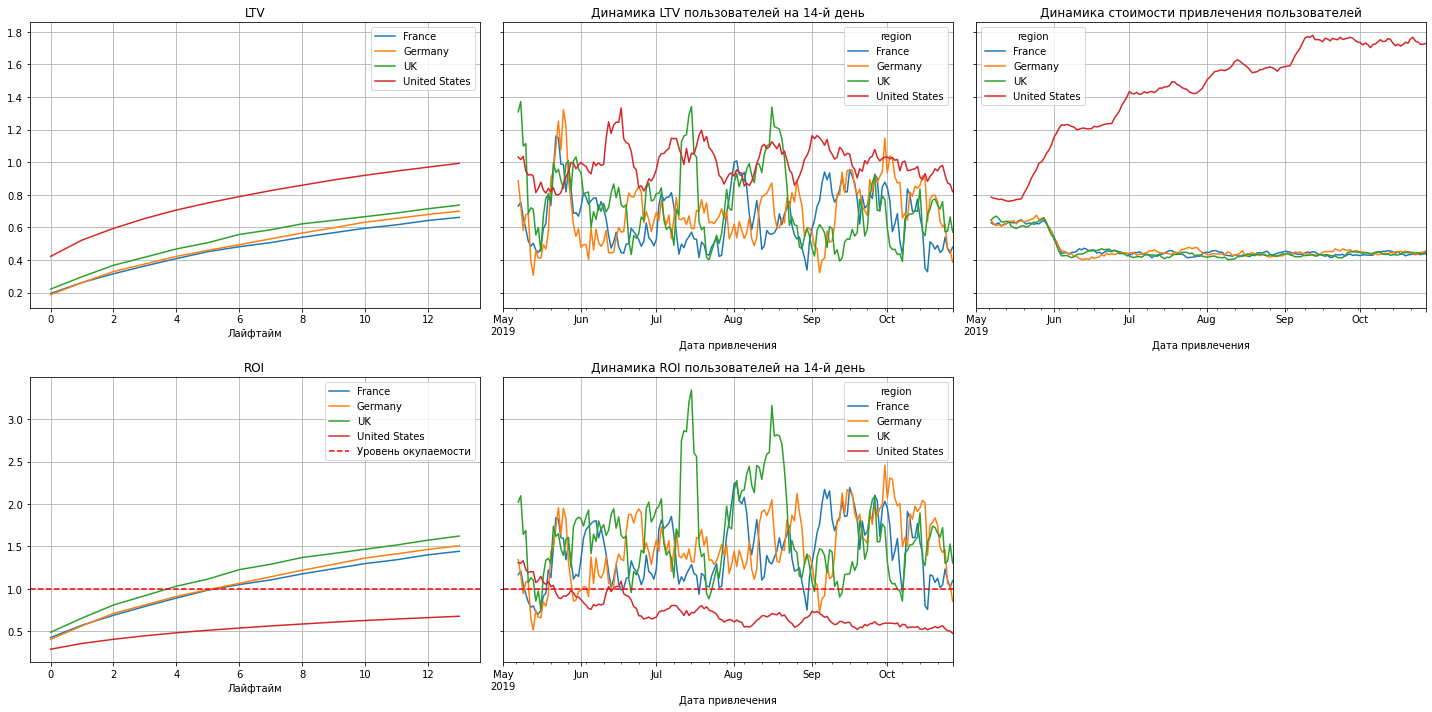

In [49]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2020, 11, 1).date(), 14, dimensions=['region'])
    
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

На основании графиков можно сделать вывод об окупаемости рекламы для пользователей из Франции, Германии и Британии, реклама для пользователей США не окупается. Связано это с тем, что стоимость привлечения пользователей США в течение всего периода наблюдения значительно, в три раза выше, чем CAC пользователей  из Франции, Германии и Британии. При этом значение LTV у пользователей из США незначительно выше.

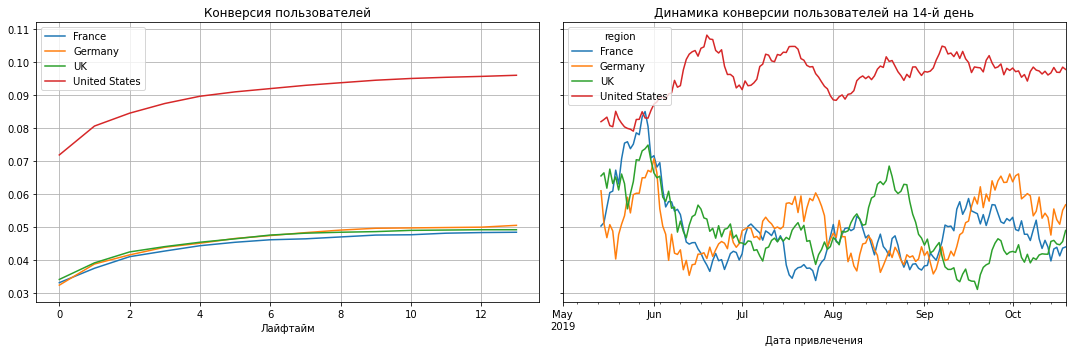

In [50]:
# смотрим конверсию с разбивкой по региону

result_raw, result_grouped, result_in_time = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region'])

plot_conversion(result_grouped, result_in_time, 14, window=14)

Конверсия пользователей из США почти в два раза выше, чем у пользователей из других регионов.

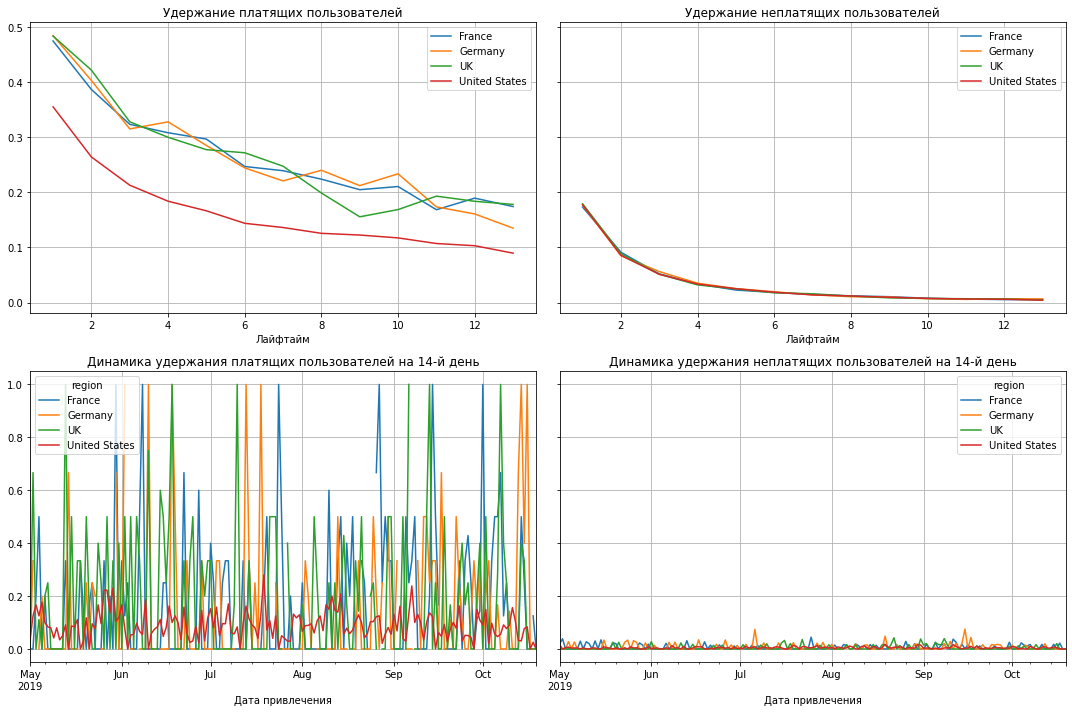

In [51]:
# смотрим удержание с разбивкой по региону

result_raw, result_grouped, result_in_time = get_retention(
    profiles, sessions, datetime(2019, 11, 1).date(), 14, dimensions=['region'])

plot_retention(result_grouped, result_in_time, 14)

Удержание пользователей из США значительно ниже, чем у пользователей из других регионов.

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам

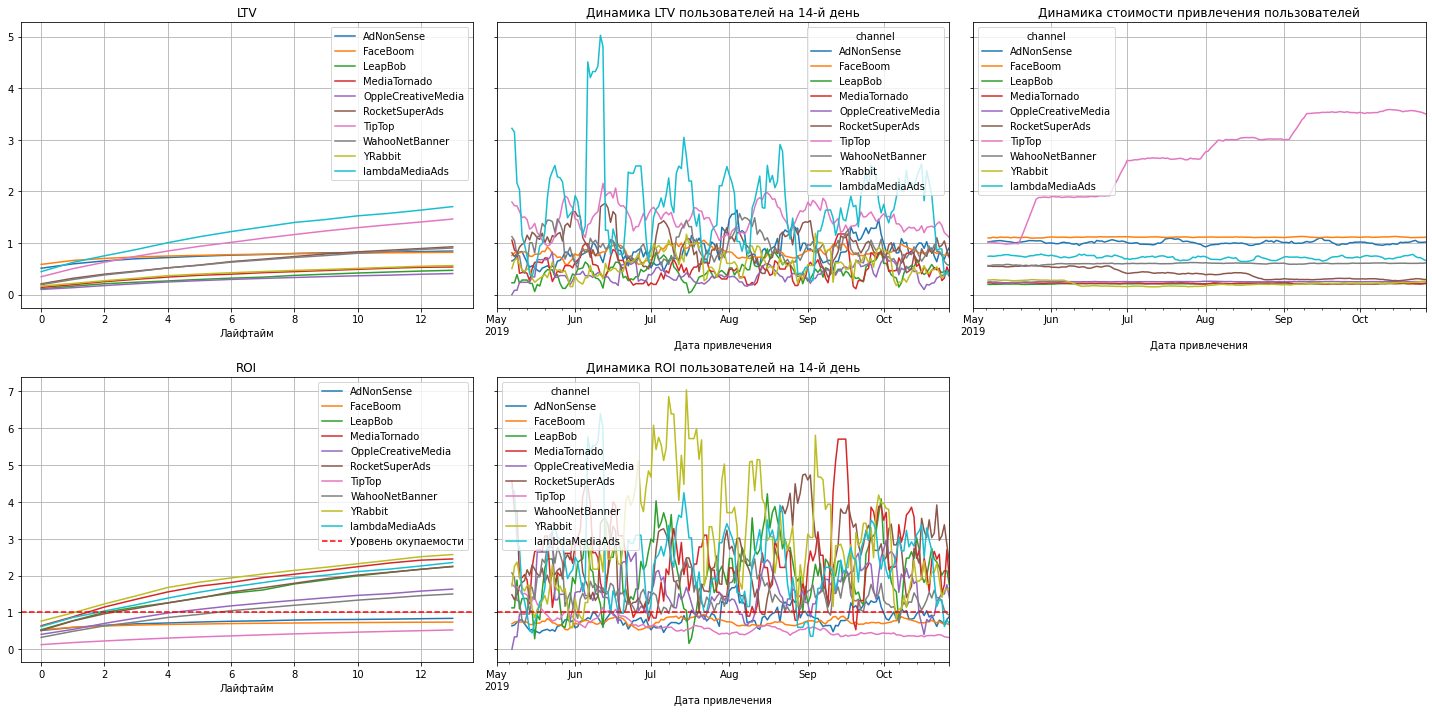

In [52]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2020, 11, 1).date(), 14, dimensions=['channel'])
    
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Разбивка по рекламным каналам показывает, как пользователи с каналов с примерно равными значениями LTV могут значительно отличаться по стоимости привлечения и, соответственно, реклама на этих каналах может окупаться или нет. Лидер по стоимости привлечения пользователей рекламный канал Tip Top не окупает расходов на рекламу, ROI этого канала меньше 1 постоянно. Вместе с ним не окупаются расходы на рекламу по каналам FaceBoom и AdNonSense.Реклама на остальных семи рекламных каналах окупается в определенный в бизнес-плане двухнедельный срок. Канал lambdaMediaAds имеет высокую стоимость привлечения пользователей, при этом у пользователей из этого канала самое высокое значение LTV, что и обеспечивает окупаемость рекламы на этом канале.

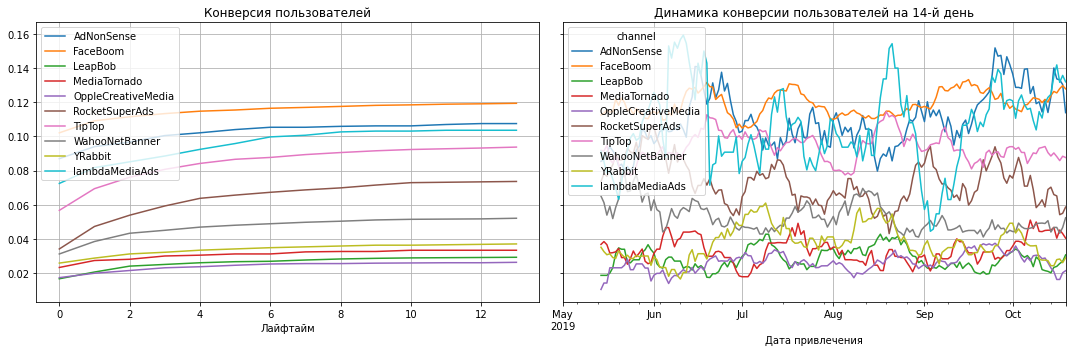

In [53]:
# смотрим конверсию с разбивкой по каналу

result_raw, result_grouped, result_in_time = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

plot_conversion(result_grouped, result_in_time, 14, window=14)

Самая высокая конверсия у пользователей канала FaceBoom.

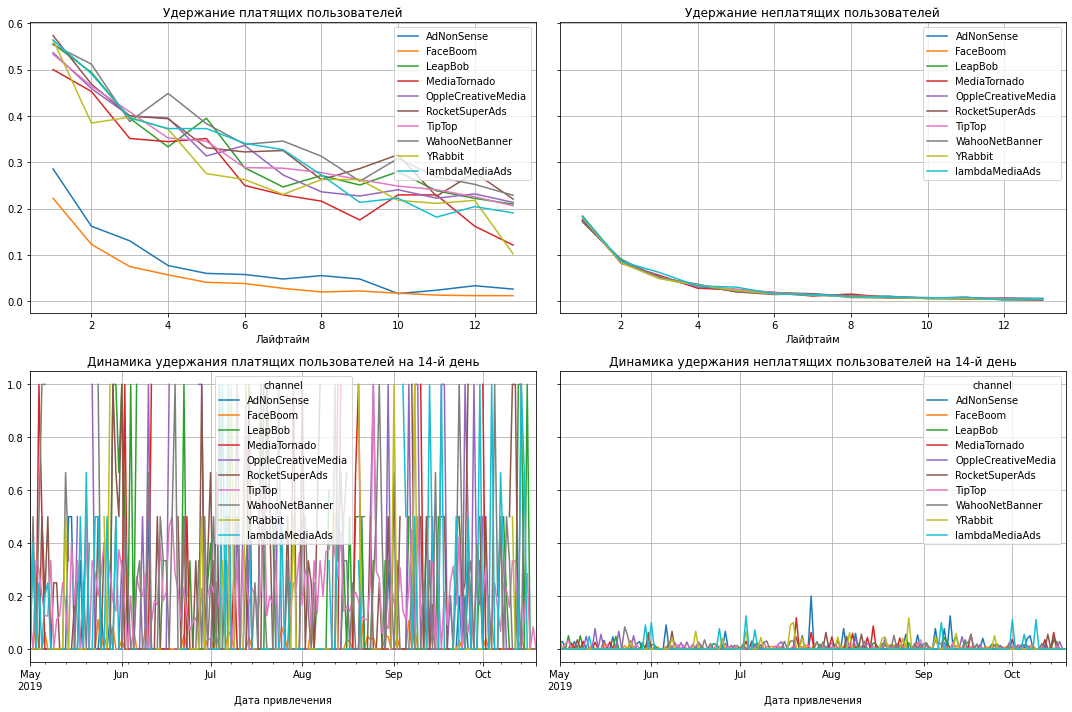

In [54]:
# смотрим удержание с разбивкой по каналу

result_raw, result_grouped, result_in_time = get_retention(
    profiles, sessions, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

plot_retention(result_grouped, result_in_time, 14)

Удержание платящих пользователей наименьшее для канала FaceBoom, также низкий показатель канала AdNonSense.

### Выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Неэффективность рекламы объясняется тем, что в течение рассматриваемого периода расходы по привлечению пользователей постоянно растут, а LTV пользователей остается на одном уровне. Соответственно, ROI рекламы постоянно снижается. Предусмотренная бизнес-планом окупаемость рекламы за две недели не достигается.

Среди устройств окупаемость рекламы достигается только на PC, на остальных устройствах реклама не окупается. Несмотря на низкую конверсию пользователей, у пользователей данных устройств высокий коэффициент удержания, также для этих устройств самая низкая стоимость привлечения пользователей. Для остальных устройств характерен постоянный рост расходов на рекламу при неизменном LTV, что и объясняет недостижение целевых показателей.

Если рассматривать регионы, то реклама окупается для всех регионов, кроме США. Для региона США высокая конверсия, но низкий коээфициент удержания и постоянно растущие, высокие по сравнению с остальными регионами расходы на рекламу.

По рекламным каналам ситуация следующая. Не окупаются каналы, на которые тратится основной рекламный бюджет, это TipTop	и FaceBoom. При этом, у канала TipTop высокая конверсия и высокий коэффициент удержания, но очень высокая стоимость привлечения пользователей. У канала FaceBoom стоимость привлечения пользователей значительно ниже, хорошая конверсия, но очень низкий коэффициент удержания. Также канал AdNonSense имеет низкий коэффициент удержания и по этой причине реклама на этом канале не окупается. Реклама на остальных каналах окупается.

Рекомендации для отдела маркетинга

Необходимо установить причину, по которой рекламный канал FaceBoom показывает самое низкое значение Retention Rate. Также необходимо обратить внимание на канал AdNonSense, коэффициент удержания которого близок к FaceBoom.
В целом, необходимо обратить внимание на регионы Британия, Германия, Франция. За исключением AdNonSense, рекламные каналы в этих регионах являются перспективными. В регионе США необходимо обратить внимание на рекламные каналы YRabbit и MediaTornado. Эти каналы окупаются, имеют низкий CAC, хороший коэффициент удержания.	